In [1]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.spatial import ConvexHull

In [2]:
dir = '/home/user/Desktop/Datos/'
#dir = '/Users/antoniomendez/Desktop/Tesis/Datos/datos_limpios/'

In [3]:
def count_trips_mibici(data_user, threshold = 5):
    viajes_user = data_user.groupby([data_user[['Origen_Id', 'Destino_Id']].min(axis=1), data_user[['Origen_Id', 'Destino_Id']].max(axis=1)]).size().reset_index(name='counts')
    viajes_user.columns = ['Est_A', 'Est_B', 'counts']
    viajes_user = viajes_user[viajes_user['counts'] >= threshold]
    total = viajes_user['counts'].sum()
    viajes_user['prob'] = viajes_user['counts']/total
    return viajes_user

def leer_matriz(nombre_archivo):
    matriz = []
    with open(nombre_archivo, 'r') as archivo:
        archivo.readline()
        archivo.readline()
        for linea in archivo:
            fila = [float(valor) for valor in linea.strip().split()]
            matriz.append(fila)
    return matriz

def encontrar_estacion(est, matriz):
    for i in range(len(matriz)):
        if matriz[i][0] == est:
            return matriz[i][1], matriz[i][2]
    return None, None

In [4]:
# Load data
data_2019 = pd.read_csv(f'{dir}mibici/2019.csv')
data = data_2019[data_2019['Inicio_del_viaje'].str.startswith('2019-01')]
del data_2019
estaciones = leer_matriz(f'{dir}/Adj_mibici/matrices_estaciones/est_2019.txt')
#estaciones = leer_matriz('/Users/antoniomendez/Desktop/Tesis/Datos/Adj_mibici/matrices_estaciones/est_2019.txt')

In [5]:
data.head()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Tiempo_viaje
0,8901295,341162,M,1992,2019-01-01 00:00:00,2019-01-01 00:16:09,50,54,16.150000
1,8901296,413443,M,1985,2019-01-01 06:01:05,2019-01-01 06:16:27,38,194,15.366667
2,8901297,444232,M,1995,2019-01-01 06:01:19,2019-01-01 06:09:55,86,18,8.600000
3,8901298,437533,M,1998,2019-01-01 06:01:25,2019-01-01 06:02:04,86,86,0.650000
4,8901299,430224,M,1992,2019-01-01 06:01:57,2019-01-01 06:05:01,27,52,3.066667


In [6]:
data["Inicio_del_viaje"] = pd.to_datetime(data["Inicio_del_viaje"])
data.head()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Tiempo_viaje
0,8901295,341162,M,1992,2019-01-01 00:00:00,2019-01-01 00:16:09,50,54,16.150000
1,8901296,413443,M,1985,2019-01-01 06:01:05,2019-01-01 06:16:27,38,194,15.366667
2,8901297,444232,M,1995,2019-01-01 06:01:19,2019-01-01 06:09:55,86,18,8.600000
3,8901298,437533,M,1998,2019-01-01 06:01:25,2019-01-01 06:02:04,86,86,0.650000
4,8901299,430224,M,1992,2019-01-01 06:01:57,2019-01-01 06:05:01,27,52,3.066667


In [7]:
data["Fin_del_viaje"] = pd.to_datetime(data["Fin_del_viaje"])
data.head()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Tiempo_viaje
0,8901295,341162,M,1992,2019-01-01 00:00:00,2019-01-01 00:16:09,50,54,16.150000
1,8901296,413443,M,1985,2019-01-01 06:01:05,2019-01-01 06:16:27,38,194,15.366667
2,8901297,444232,M,1995,2019-01-01 06:01:19,2019-01-01 06:09:55,86,18,8.600000
3,8901298,437533,M,1998,2019-01-01 06:01:25,2019-01-01 06:02:04,86,86,0.650000
4,8901299,430224,M,1992,2019-01-01 06:01:57,2019-01-01 06:05:01,27,52,3.066667


In [8]:
data['dia_semana'] = data['Inicio_del_viaje'].dt.day_name()
data.head()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Tiempo_viaje,dia_semana
0,8901295,341162,M,1992,2019-01-01 00:00:00,2019-01-01 00:16:09,50,54,16.150000,Tuesday
1,8901296,413443,M,1985,2019-01-01 06:01:05,2019-01-01 06:16:27,38,194,15.366667,Tuesday
2,8901297,444232,M,1995,2019-01-01 06:01:19,2019-01-01 06:09:55,86,18,8.600000,Tuesday
3,8901298,437533,M,1998,2019-01-01 06:01:25,2019-01-01 06:02:04,86,86,0.650000,Tuesday
4,8901299,430224,M,1992,2019-01-01 06:01:57,2019-01-01 06:05:01,27,52,3.066667,Tuesday


In [9]:
def count_trips_mibici(data_user, threshold = 5):
    viajes_user = data_user.groupby([data_user[['Origen_Id', 'Destino_Id']].min(axis=1), data_user[['Origen_Id', 'Destino_Id']].max(axis=1)]).size().reset_index(name='counts')
    viajes_user.columns = ['Est_A', 'Est_B', 'counts']
    viajes_user = viajes_user[viajes_user['counts'] >= threshold]
    total = viajes_user['counts'].sum()
    viajes_user['prob'] = viajes_user['counts']/total
    return viajes_user

def leer_matriz(nombre_archivo):
    matriz = []
    with open(nombre_archivo, 'r') as archivo:
        archivo.readline()
        archivo.readline()
        for linea in archivo:
            fila = [float(valor) for valor in linea.strip().split()]
            matriz.append(fila)
    return matriz

def encontrar_estacion(est, matriz):
    for i in range(len(matriz)):
        if matriz[i][0] == est:
            return matriz[i][1], matriz[i][2]
    return None, None

In [10]:
def compute_entropy(counter_user):
    '''
    args:
    counter_user: DataFrame with columns Est_A, Est_B, counts, prob given by count_trips_mibici by a specific user
    total_counter: DataFrame with columns Est_A, Est_B, counts, prob given by count_trips_mibici by all users
    return:
    entropy: float with the entropy
    '''
    entropy = 0
    for i in range(len(counter_user)):
        prob = counter_user.iloc[i]['prob']
        entropy -= prob * np.log(prob)
    return entropy

In [11]:
def compute_compactness(counter_user, st):
    """
    args:
    counter_user: counter_user: DataFrame with columns Est_A, Est_B, counts, prob given by count_trips_mibici by a specific user
    st: matrix with the id, latitude and longitude of each station
    return:
    compactness: float with the compactness
    """
    vertex = []
    stations = [] 
    l = 0
    for i in range(len(counter_user)):
        current_data = counter_user.iloc[i]
        est_A = current_data["Est_A"]
        est_B = current_data["Est_B"]
        loc_A = encontrar_estacion(est_A, st)
        loc_B = encontrar_estacion(est_B, st)

        l += np.linalg.norm(np.array(loc_A) - np.array(loc_B)) * current_data["counts"]

        if est_A not in vertex:
            vertex.append(est_A)
            stations.append(loc_A)
        if est_B not in vertex:
            vertex.append(est_B)
            stations.append(loc_B)

    if len(vertex) <= 2:
        return 1
    stations = np.array(stations)
    ch = ConvexHull(stations)
    area = ch.volume
    #print(area, l)
    compactness = 1 - 4*area / (l - 2*np.sqrt(area))**2
    return compactness

In [12]:
users_counts = data['Usuario_Id'].value_counts()
users = users_counts.index.tolist()

364356
430064
451603


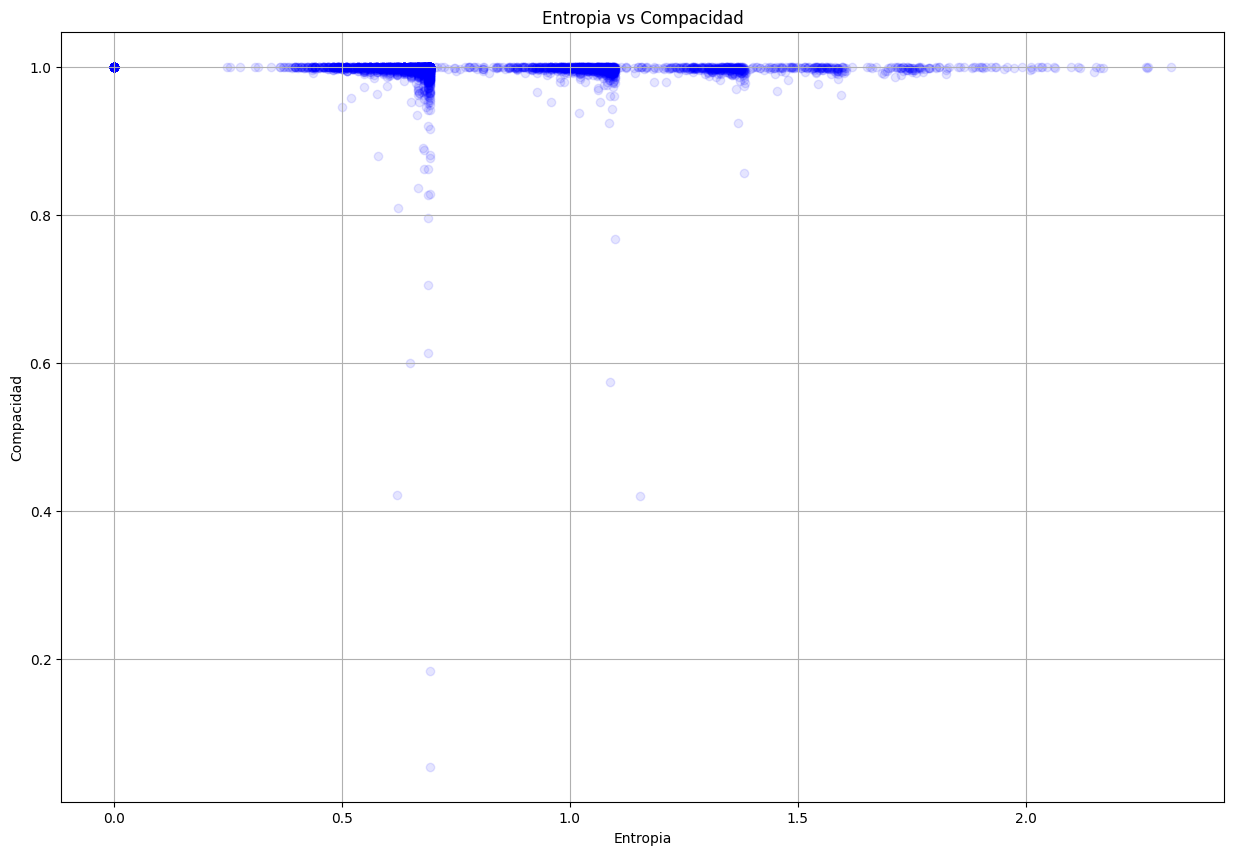

In [12]:
plt.figure(figsize=(15,10))
for user in users:
    current_data = data[data["Usuario_Id"] == user]
    current_counter = count_trips_mibici(current_data)
    if len(current_counter) == 0:
        continue
    try:
        entropy = compute_entropy(current_counter)
        compactness = compute_compactness(current_counter, estaciones)
        if compactness > 0:
            plt.scatter(entropy, compactness, alpha=0.1, c="b")
        else:
            print(user)
    except:
        continue
plt.xlabel("Entropia")
plt.ylabel("Compacidad")
plt.grid()
plt.title("Entropia vs Compacidad")
plt.show()

In [13]:
weekends = ['Saturday', 'Sunday']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

weeks = [
    ('2019-01-01', '2019-01-06'),
    ('2019-01-07', '2019-01-13'),
    ('2019-01-14', '2019-01-20'),
    ('2019-01-21', '2019-01-27'),
    ('2019-01-28', '2019-01-31')
]

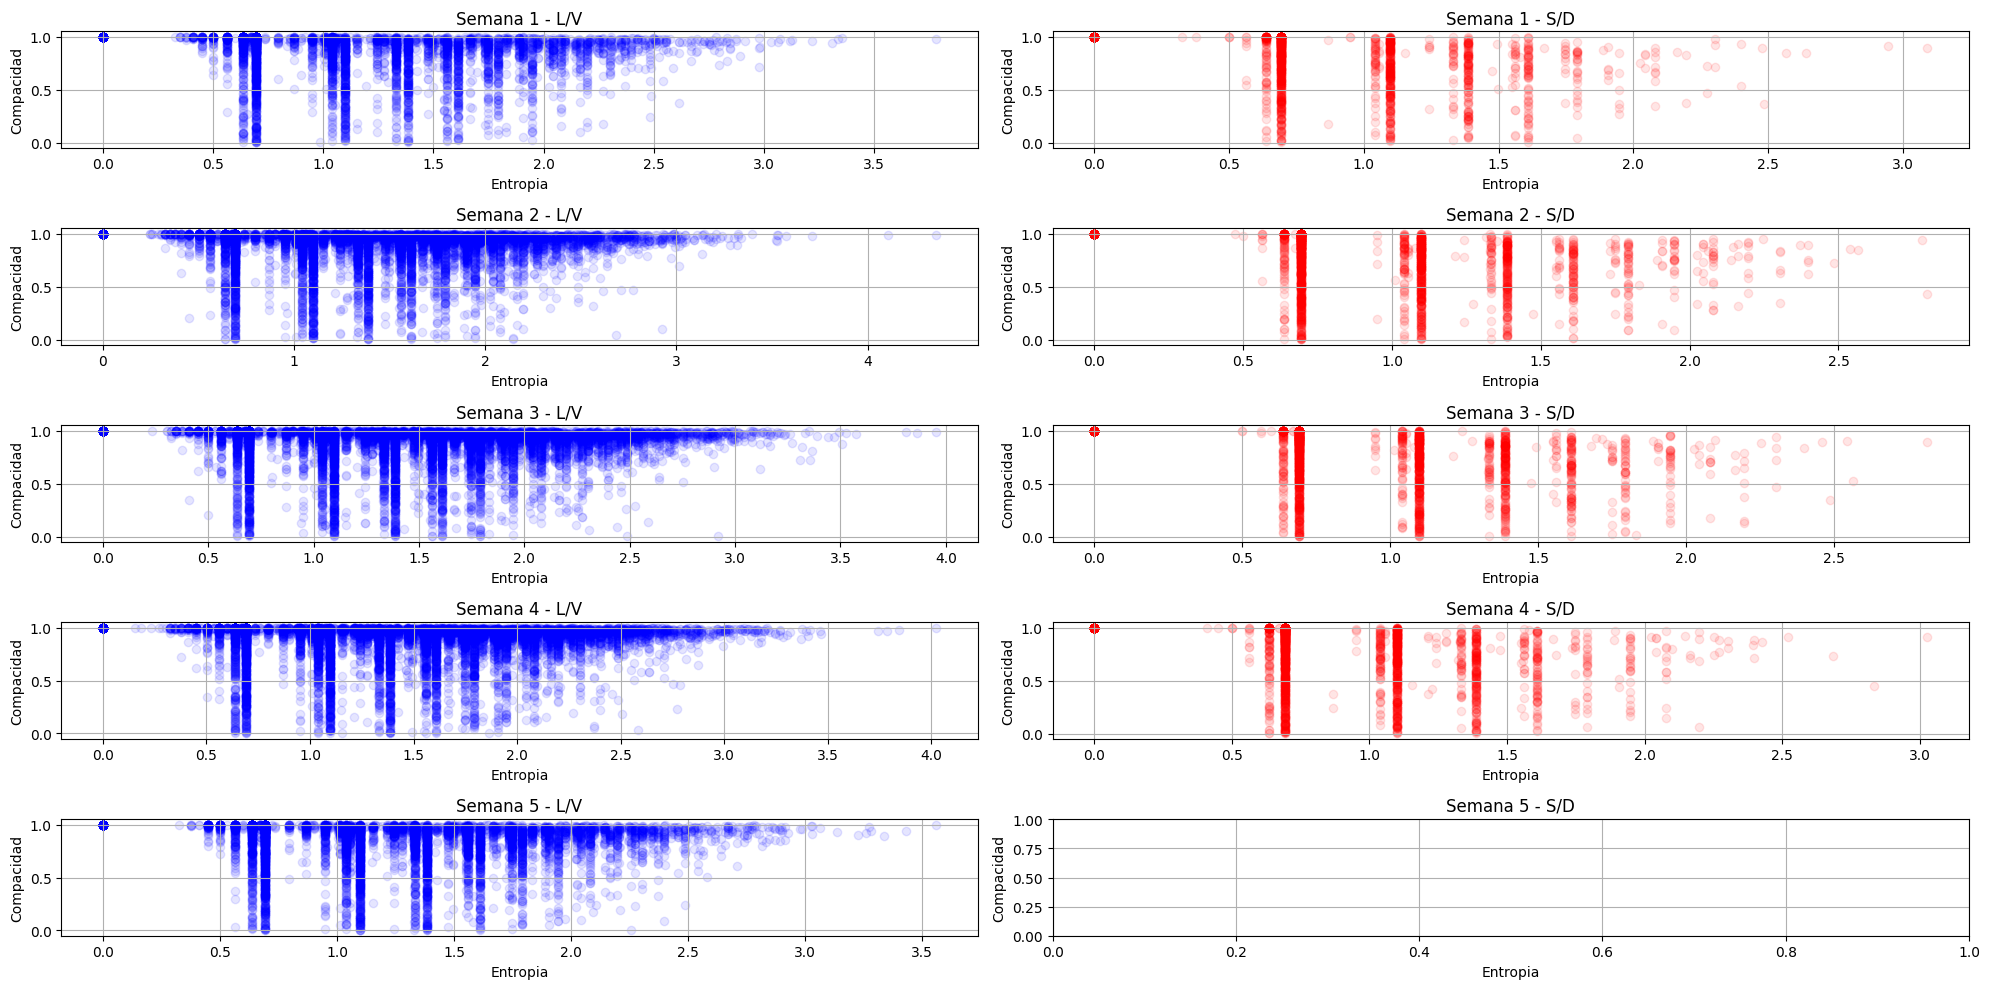

In [ ]:
plt.figure(figsize=(20, 10))

for i, (start_date, end_date) in enumerate(weeks):
    week_data = data[(data['Inicio_del_viaje'] >= start_date) & (data['Inicio_del_viaje'] <= end_date)]
    
    weekend_data = week_data[week_data['dia_semana'].isin(weekends)]
    weekday_data = week_data[week_data['dia_semana'].isin(weekdays)]
    
    plt.subplot(5, 2, i * 2 + 1)
    for user in users:
        current_data = weekday_data[weekday_data["Usuario_Id"] == user]
        current_counter = count_trips_mibici(current_data, threshold=1)
        if len(current_counter) == 0:
            continue
        try:
            entropy = compute_entropy(current_counter)
            compactness = compute_compactness(current_counter, estaciones)
            if compactness >= 0:
                plt.scatter(entropy, compactness, alpha=0.1, c="b")
        except:
            continue
    plt.xlabel("Entropia")
    plt.ylabel("Compacidad")
    plt.grid()
    plt.title(f"Semana {i + 1} - L/V")
    
    plt.subplot(5, 2, i * 2 + 2)
    for user in users:
        current_data = weekend_data[weekend_data["Usuario_Id"] == user]
        current_counter = count_trips_mibici(current_data, threshold=1)
        if len(current_counter) == 0:
            continue
        try:
            entropy = compute_entropy(current_counter)
            compactness = compute_compactness(current_counter, estaciones)
            if compactness >= 0:
                plt.scatter(entropy, compactness, alpha=0.1, c="r")
        except:
            continue
    plt.xlabel("Entropia")
    plt.ylabel("Compacidad")
    plt.grid()
    plt.title(f"Semana {i + 1} - S/D")

plt.tight_layout()
plt.show()

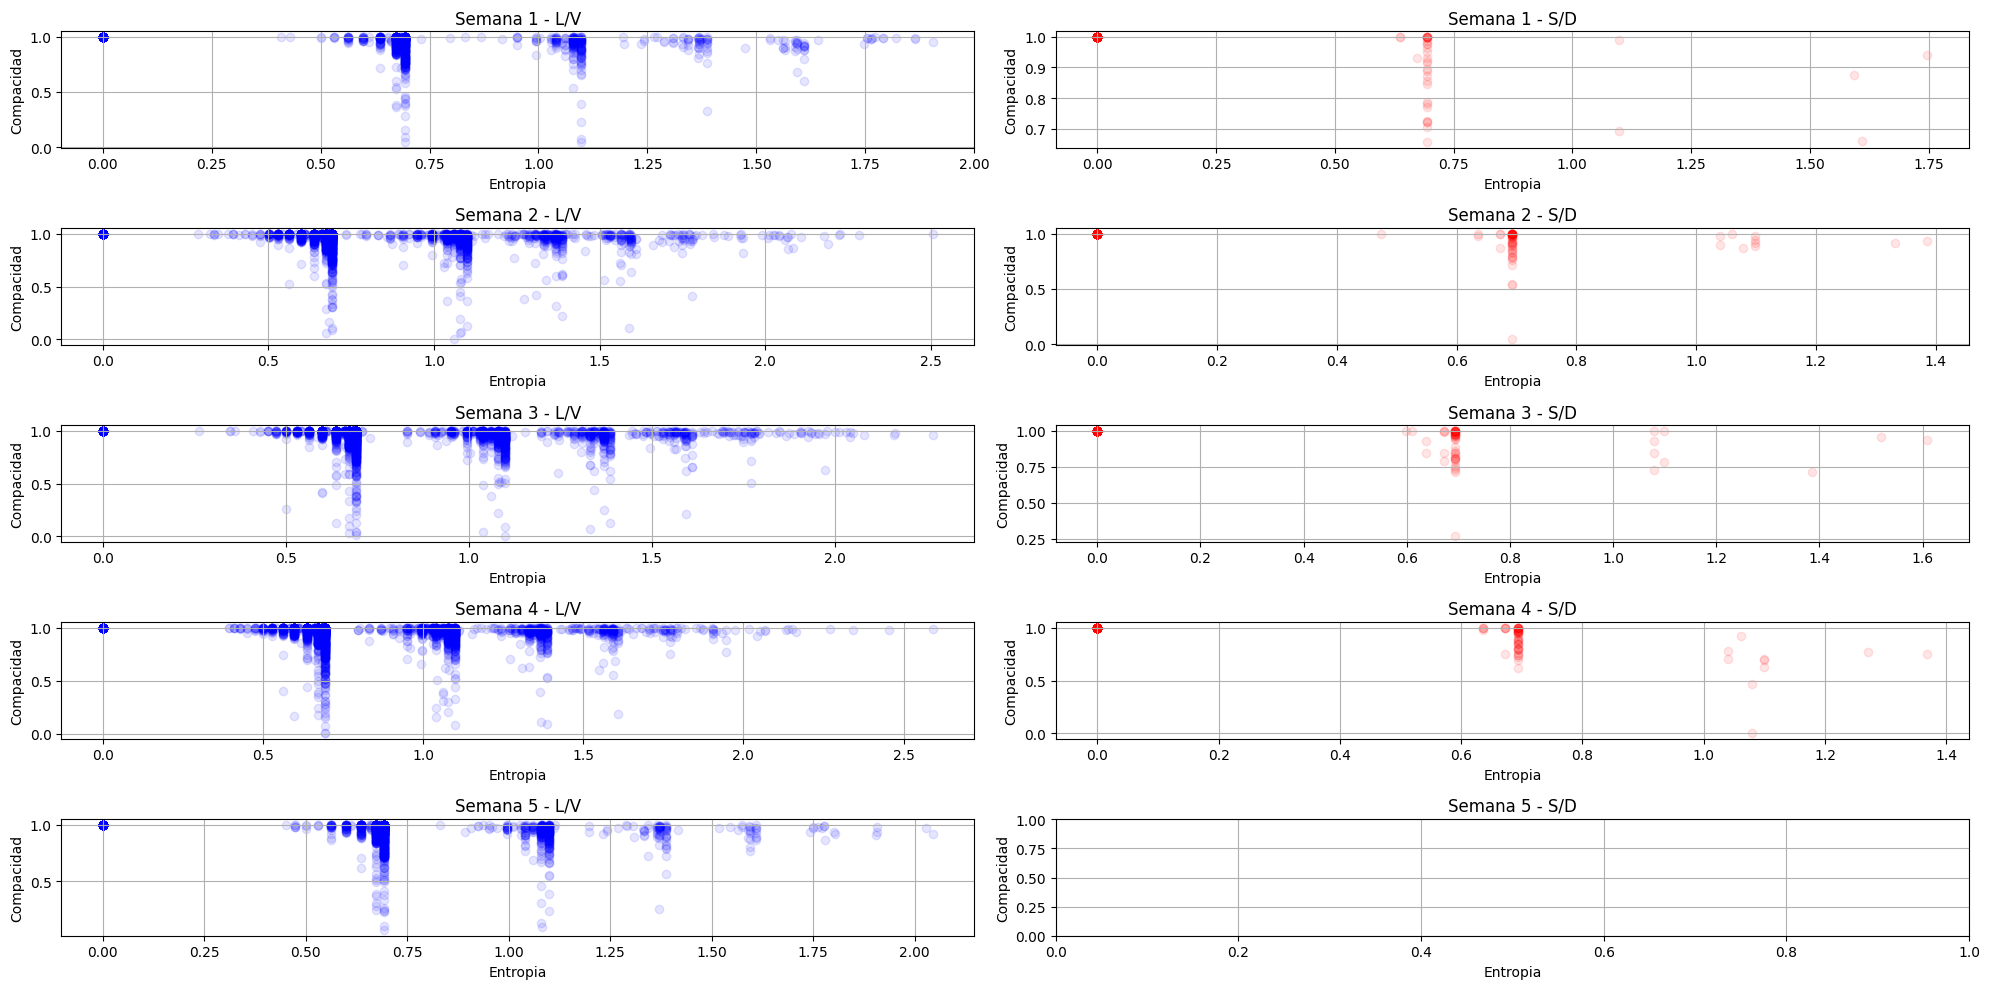

In [15]:
plt.figure(figsize=(20, 10))

for i, (start_date, end_date) in enumerate(weeks):
    week_data = data[(data['Inicio_del_viaje'] >= start_date) & (data['Inicio_del_viaje'] <= end_date)]
    
    weekend_data = week_data[week_data['dia_semana'].isin(weekends)]
    weekday_data = week_data[week_data['dia_semana'].isin(weekdays)]
    
    plt.subplot(5, 2, i * 2 + 1)
    for user in users:
        current_data = weekday_data[weekday_data["Usuario_Id"] == user]
        current_counter = count_trips_mibici(current_data, threshold=2)
        if len(current_counter) == 0:
            continue
        try:
            entropy = compute_entropy(current_counter)
            compactness = compute_compactness(current_counter, estaciones)
            if compactness >= 0:
                plt.scatter(entropy, compactness, alpha=0.1, c="b")
        except:
            continue
    plt.xlabel("Entropia")
    plt.ylabel("Compacidad")
    plt.grid()
    plt.title(f"Semana {i + 1} - L/V")
    
    plt.subplot(5, 2, i * 2 + 2)
    for user in users:
        current_data = weekend_data[weekend_data["Usuario_Id"] == user]
        current_counter = count_trips_mibici(current_data, threshold=2)
        if len(current_counter) == 0:
            continue
        try:
            entropy = compute_entropy(current_counter)
            compactness = compute_compactness(current_counter, estaciones)
            if compactness >= 0:
                plt.scatter(entropy, compactness, alpha=0.1, c="r")
        except:
            continue
    plt.xlabel("Entropia")
    plt.ylabel("Compacidad")
    plt.grid()
    plt.title(f"Semana {i + 1} - S/D")

plt.tight_layout()
plt.show()

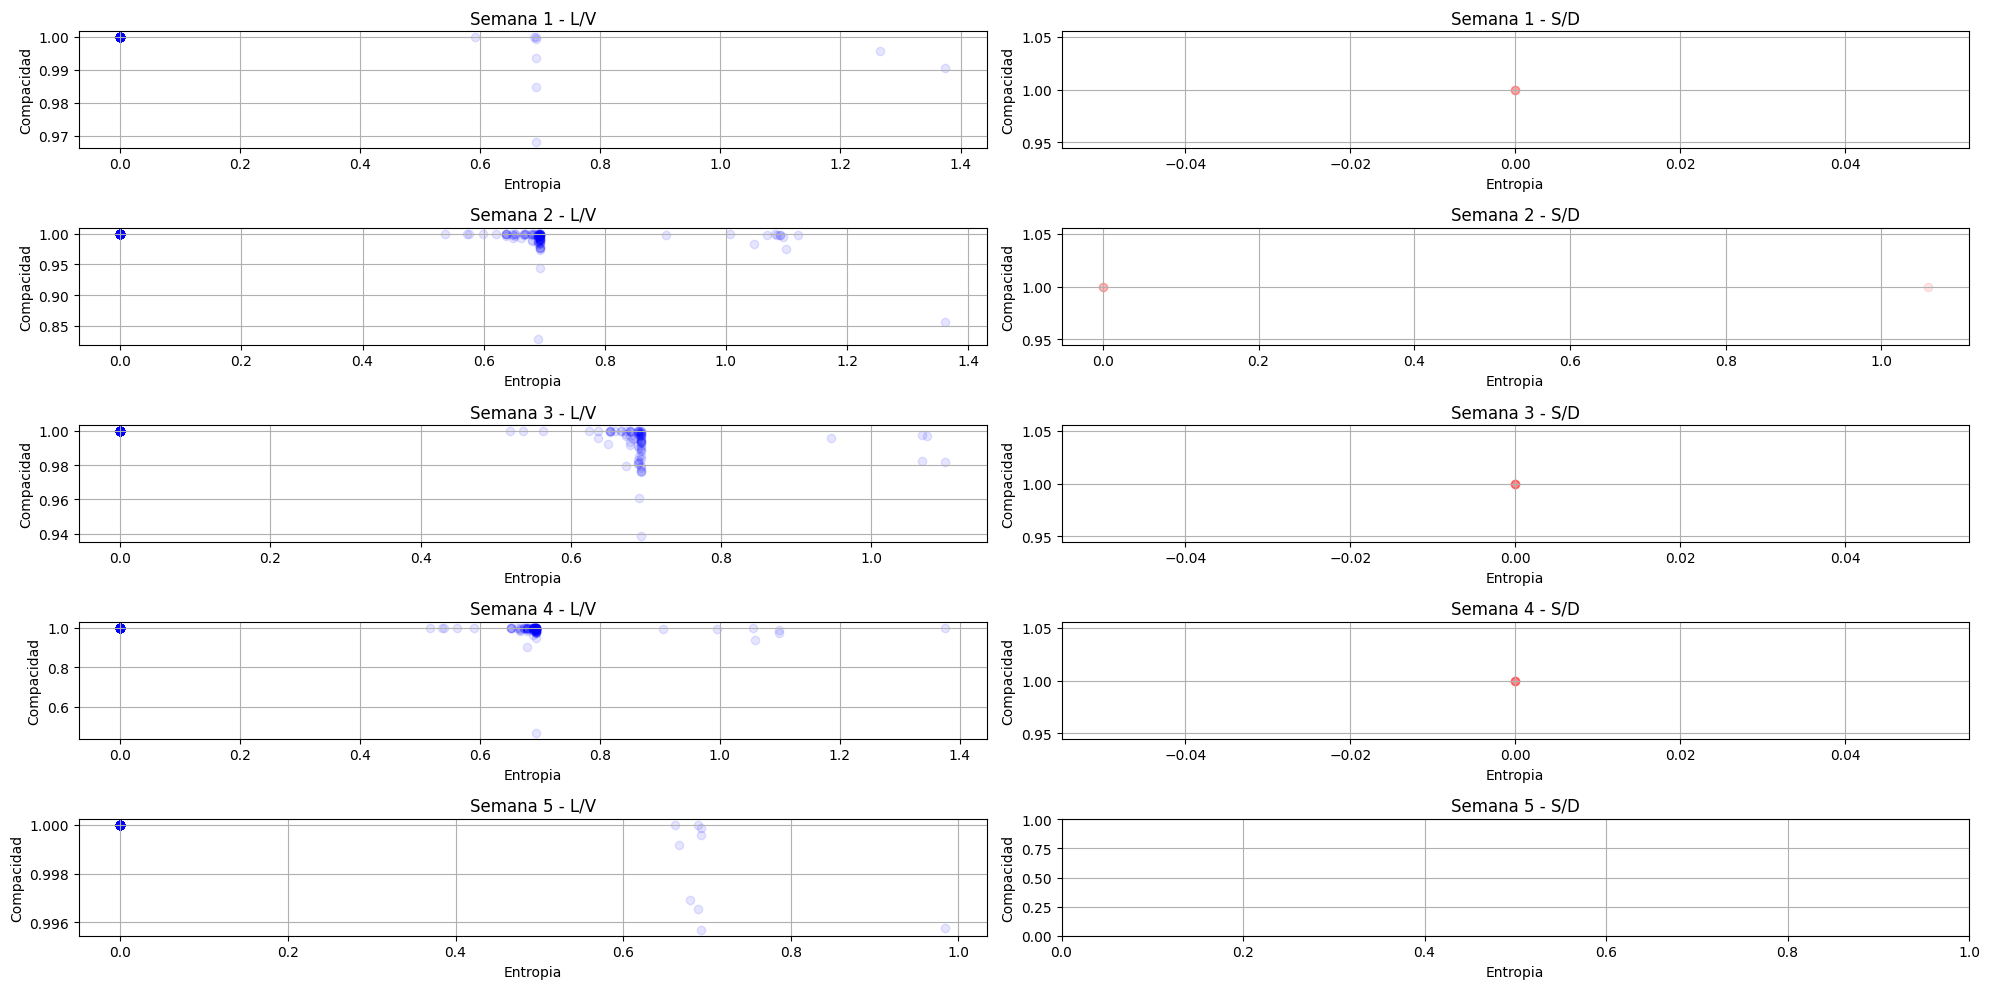

In [14]:
plt.figure(figsize=(20, 10))

for i, (start_date, end_date) in enumerate(weeks):
    week_data = data[(data['Inicio_del_viaje'] >= start_date) & (data['Inicio_del_viaje'] <= end_date)]
    
    weekend_data = week_data[week_data['dia_semana'].isin(weekends)]
    weekday_data = week_data[week_data['dia_semana'].isin(weekdays)]
    
    plt.subplot(5, 2, i * 2 + 1)
    for user in users:
        current_data = weekday_data[weekday_data["Usuario_Id"] == user]
        current_counter = count_trips_mibici(current_data)
        if len(current_counter) == 0:
            continue
        try:
            entropy = compute_entropy(current_counter)
            compactness = compute_compactness(current_counter, estaciones)
            if compactness >= 0:
                plt.scatter(entropy, compactness, alpha=0.1, c="b")
        except:
            continue
    plt.xlabel("Entropia")
    plt.ylabel("Compacidad")
    plt.grid()
    plt.title(f"Semana {i + 1} - L/V")
    
    plt.subplot(5, 2, i * 2 + 2)
    for user in users:
        current_data = weekend_data[weekend_data["Usuario_Id"] == user]
        current_counter = count_trips_mibici(current_data)
        if len(current_counter) == 0:
            continue
        try:
            entropy = compute_entropy(current_counter)
            compactness = compute_compactness(current_counter, estaciones)
            if compactness >= 0:
                plt.scatter(entropy, compactness, alpha=0.1, c="r")
        except:
            continue
    plt.xlabel("Entropia")
    plt.ylabel("Compacidad")
    plt.grid()
    plt.title(f"Semana {i + 1} - S/D")

plt.tight_layout()
plt.show()

In [15]:
users_2 = []
for user in users:
    current_data = data[data["Usuario_Id"] == user]
    current_counter = count_trips_mibici(current_data)
    if len(current_counter) == 0:
        continue
    else:
        users_2.append(user)

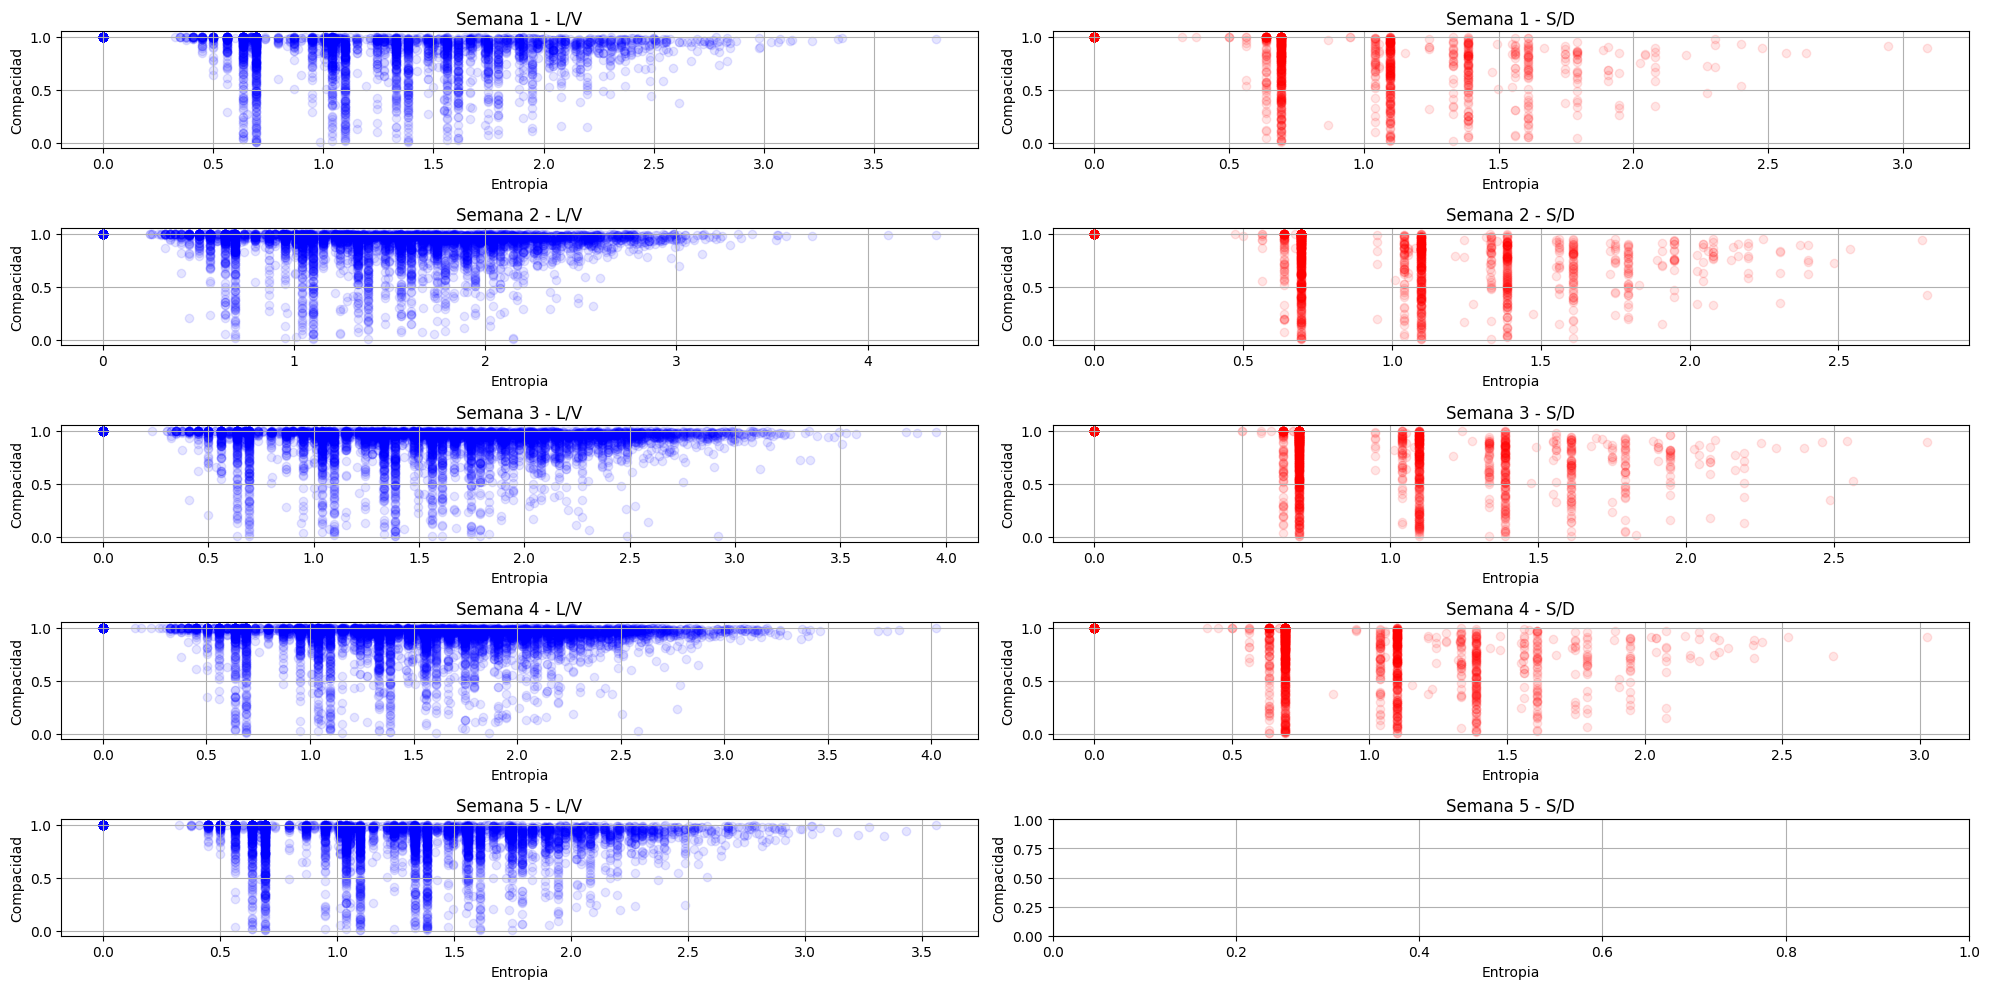

In [16]:
plt.figure(figsize=(20, 10))

for i, (start_date, end_date) in enumerate(weeks):
    week_data = data[(data['Inicio_del_viaje'] >= start_date) & (data['Inicio_del_viaje'] <= end_date)]
    
    weekend_data = week_data[week_data['dia_semana'].isin(weekends)]
    weekday_data = week_data[week_data['dia_semana'].isin(weekdays)]
    
    plt.subplot(5, 2, i * 2 + 1)
    for user in users_2:
        current_data = weekday_data[weekday_data["Usuario_Id"] == user]
        current_counter = count_trips_mibici(current_data, threshold=1)
        if len(current_counter) == 0:
            continue
        try:
            entropy = compute_entropy(current_counter)
            compactness = compute_compactness(current_counter, estaciones)
            if compactness >= 0:
                plt.scatter(entropy, compactness, alpha=0.1, c="b")
        except:
            continue
    plt.xlabel("Entropia")
    plt.ylabel("Compacidad")
    plt.grid()
    plt.title(f"Semana {i + 1} - L/V")
    
    plt.subplot(5, 2, i * 2 + 2)
    for user in users_2:
        current_data = weekend_data[weekend_data["Usuario_Id"] == user]
        current_counter = count_trips_mibici(current_data, threshold=1)
        if len(current_counter) == 0:
            continue
        try:
            entropy = compute_entropy(current_counter)
            compactness = compute_compactness(current_counter, estaciones)
            if compactness >= 0:
                plt.scatter(entropy, compactness, alpha=0.1, c="r")
        except:
            continue
    plt.xlabel("Entropia")
    plt.ylabel("Compacidad")
    plt.grid()
    plt.title(f"Semana {i + 1} - S/D")

plt.tight_layout()
plt.show()

In [17]:
import requests
requests.post("https://ntfy.sh/Compu_CIMAT",
    data="Terminé".encode(encoding='utf-8'))

<Response [200]>

In [107]:
def plot_user(counter_user, est):
    vertex = list(set(counter_user['Est_A'].unique().tolist() + counter_user['Est_B'].unique().tolist()))
    #print(vertex)
    plt.figure(figsize=(10, 6))
    for i in vertex:
        esta = encontrar_estacion(i, est)
        #print(esta)
        plt.scatter(esta[1], esta[0])
        plt.text(esta[1] + 0.0001, esta[0] + 0.0001, str(i), fontsize=7, ha='left', va='bottom')
    for i in range(len(counter_user)):
        current_trip = counter_user.iloc[i]
        estA = current_trip["Est_A"]
        estB = current_trip["Est_B"]
        aux = np.array([encontrar_estacion(estA, est), encontrar_estacion(estB, est)])
        plt.plot(aux[:,1], aux[:,0])
    plt.grid()
    plt.show()

In [126]:
c0 = count_trips_mibici(data[data["Usuario_Id"]==users[0]])
c0

,Est_A,Est_B,counts,prob
5,4,86,6,0.017442
6,70,70,21,0.061047
7,70,71,12,0.034884
8,70,86,106,0.308140
12,71,86,28,0.081395
17,86,86,171,0.497093


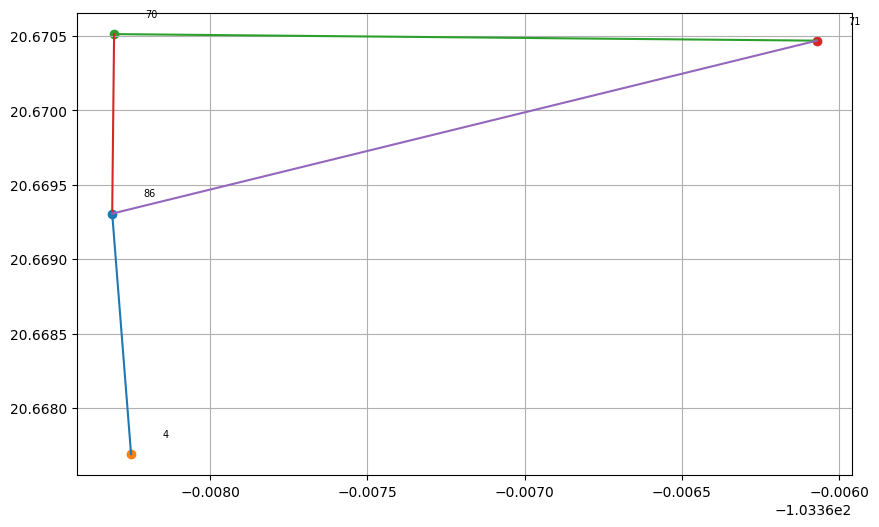

In [127]:
plot_user(c0, estaciones)

In [128]:
compute_compactness(c0, estaciones)

0.9997615948968692

In [80]:
c1 = count_trips_mibici(data[data["Usuario_Id"]==364356])
c1

,Est_A,Est_B,counts,prob
2,17,17,8,0.571429
37,286,295,6,0.428571


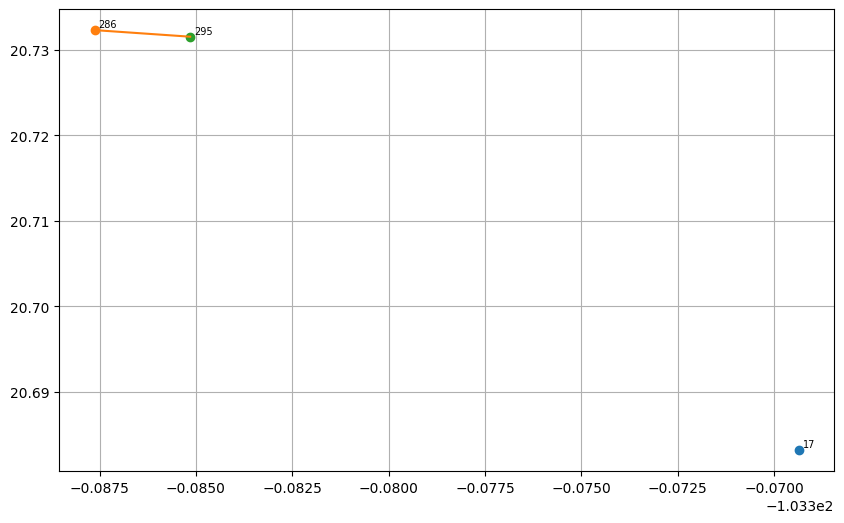

In [108]:
plot_user(c1, estaciones)

In [123]:
compute_compactness(c1, estaciones)

-264.097689407397

In [81]:
c2 = count_trips_mibici(data[data["Usuario_Id"] == 430064])
c2

,Est_A,Est_B,counts,prob
18,52,61,6,0.5
30,110,112,6,0.5


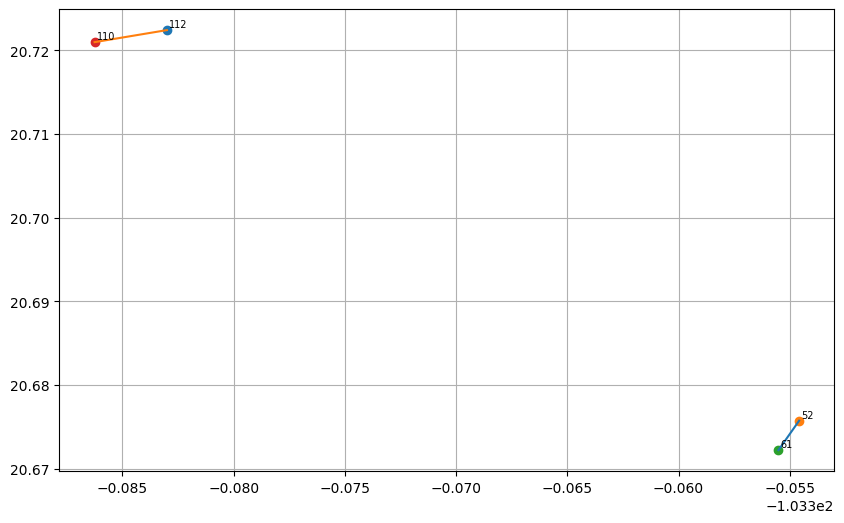

In [109]:
plot_user(c2, estaciones)

In [124]:
compute_compactness(c2, estaciones)

-1.4410079783457848

In [110]:
c3 = count_trips_mibici(data[data["Usuario_Id"]==451603])
c3

,Est_A,Est_B,counts,prob
2,34,54,5,0.454545
22,130,130,6,0.545455


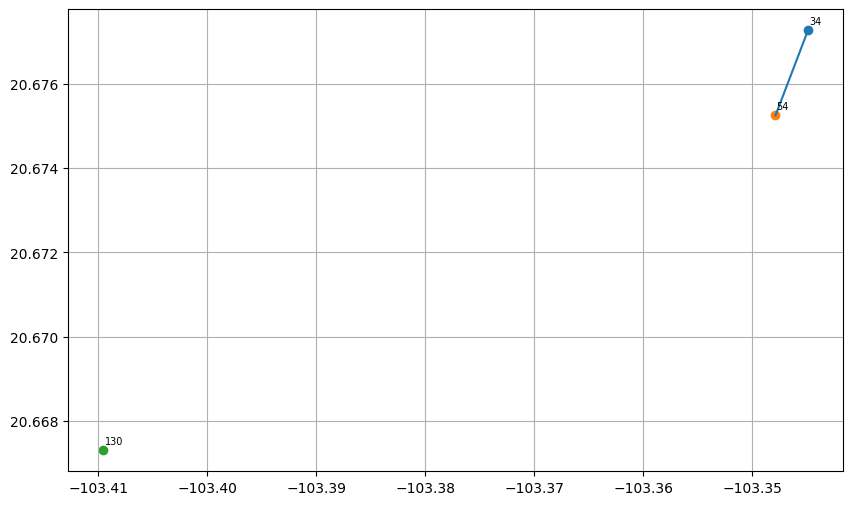

In [111]:
plot_user(c3, estaciones)

In [125]:
compute_compactness(c3, estaciones)

-12.932334090172562